# 🧹 Limpeza e Tratamento de Dados - `tempo.csv`

Este notebook apresenta uma solução de **exploração**, **limpeza** e **tratamento de dados** para o arquivo `tempo.csv`, com foco na consistência dos dados e prontidão para análises ou modelagem.

---

## 📄 Descrição do Dataset

O conjunto de dados simula condições climáticas e uma decisão associada à possibilidade de jogar em um determinado dia. As colunas e seus domínios esperados são:

| Coluna       | Tipo       | Domínio Esperado                   |
|--------------|------------|------------------------------------|
| `Aparencia`  | Categórica | `sol`, `chuva`, `nublado`          |
| `Temperatura`| Numérica   | de `-130` a `130` Fahrenheit       |
| `Umidade`    | Numérica   | de `0` a `100`                     |
| `Vento`      | Categórica | `VERDADEIRO`, `FALSO`              |
| `Jogar`      | Categórica | `sim`, `não`                       |

---

## ⚙️ Etapas da Solução

A limpeza e preparação dos dados foi realizada com base nas seguintes etapas:

### 1. 🔍 Exploração Inicial
- Verificação de formato das colunas
- Identificação de valores ausentes
- Frequência de categorias
- Estatísticas descritivas para colunas numéricas

### 2. ❌ Tratamento de Valores Nulos
- Preenchimento baseado em moda (para dados categóricos)
- Preenchimento com mediana (para dados numéricos)

### 3. ⚠️ Detecção e Tratamento de Outliers
- Uso de regras de domínio e boxplots
- Remoção ou correção de valores fora dos intervalos válidos

### 4. 🧭 Validação de Categorias
- Correção ou exclusão de categorias fora do domínio esperado em:
  - `Aparencia`
  - `Vento`
  - `Jogar`

### 5. ✅ Resultado Final
- Dataset sem valores nulos
- Dados numéricos dentro dos limites esperados
- Categorias padronizadas e consistentes

In [237]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [238]:
#importando base de dados
dataset = pd.read_csv("tempo.csv", sep=";")
dataset.shape

(14, 5)

In [239]:
dataset.head(14)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [240]:
print(dataset.dtypes)

Aparencia       object
Temperatura      int64
Umidade        float64
Vento           object
Jogar           object
dtype: object


In [241]:
#Explorando dados categóricos
#panorama de Aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

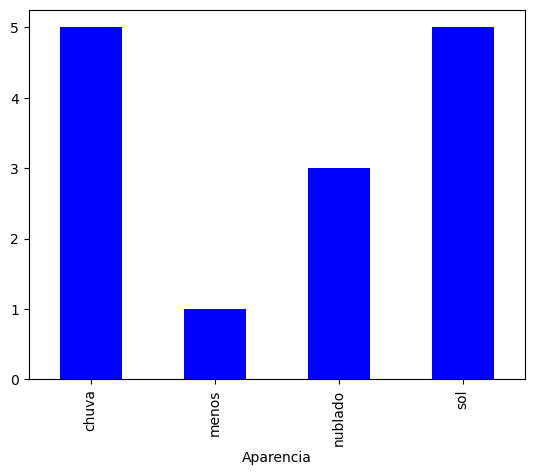

In [242]:
agrupado.plot.bar(color="blue")

In [243]:
#panorama de Vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

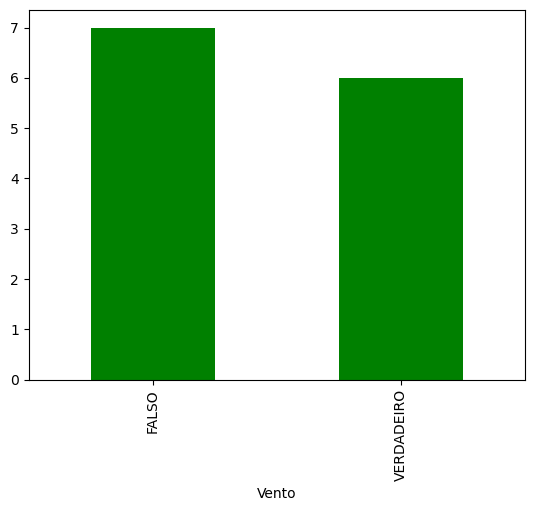

In [244]:
agrupado.plot.bar(color="green")

In [245]:
#panorama de Jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

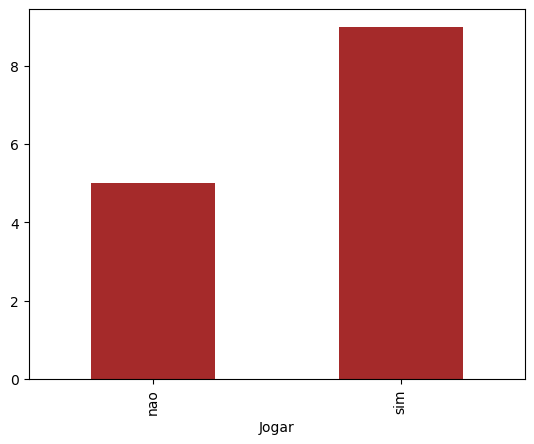

In [246]:
agrupado.plot.bar(color="brown")

In [247]:
#Explorando dados numéricos
#panorama de Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

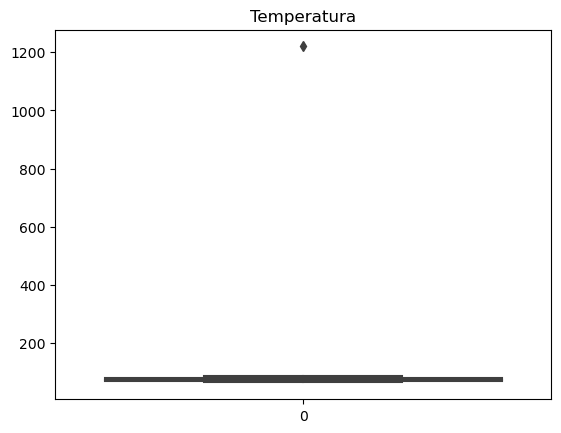

In [248]:
srn.boxplot(dataset['Temperatura']).set_title("Temperatura")

C:\Users\manda\AppData\Local\Temp\ipykernel_10452\1297418235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Temperatura'])


<Axes: xlabel='Temperatura', ylabel='Density'>

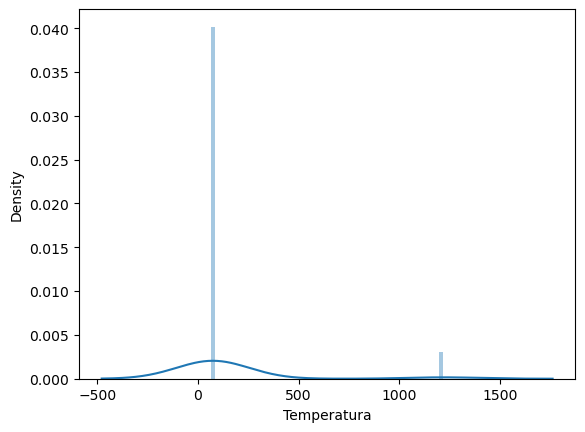

In [249]:
srn.distplot(dataset['Temperatura'])

In [250]:
#panorama de Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

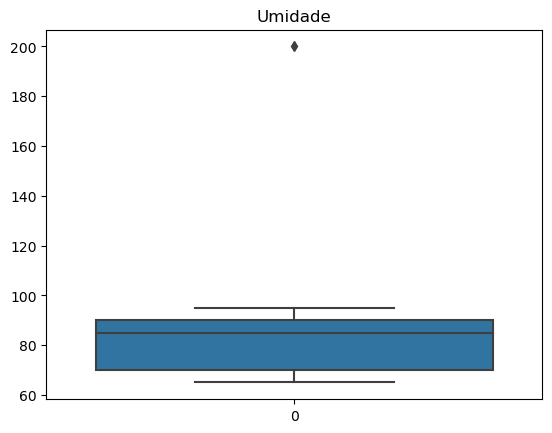

In [251]:
srn.boxplot(dataset['Umidade']).set_title("Umidade")

C:\Users\manda\AppData\Local\Temp\ipykernel_10452\3408722877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Umidade'])


<Axes: xlabel='Umidade', ylabel='Density'>

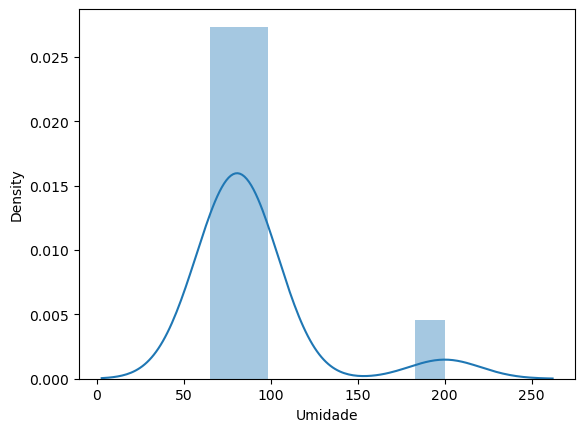

In [252]:
srn.distplot(dataset['Umidade'])

In [253]:
#Tratando dados categóricos
#panorama de Aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [254]:
#verificando se há presença de dados nulos
dataset['Aparencia'].isnull().sum()

0

In [255]:
moda = dataset['Aparencia'].mode()
moda

0    chuva
1      sol
Name: Aparencia, dtype: object

In [256]:
#Tratando valores fora do domínio substituindo-os pela moda
dataset.loc[dataset['Aparencia'].isin(["menos"]),'Aparencia'] = moda[0]
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [257]:
#panorama de Vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [258]:
#verificando se há presença de dados nulos
dataset['Vento'].isnull().sum()

1

In [259]:
moda = dataset['Vento'].mode()
moda

0    FALSO
Name: Vento, dtype: object

In [260]:
#Tratando valores nulos substituindo-os pela moda
dataset['Vento'].fillna(moda[0], inplace=True)
dataset['Vento'].isnull().sum()

0

In [261]:
#panorama de Jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

In [262]:
#verificando se há presença de dados nulos
dataset['Jogar'].isnull().sum()

0

In [263]:
#panorama de Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [264]:
#verificando se há presença de dados nulos
dataset['Temperatura'].isnull().sum()

0

In [265]:
#verificando se há presença de outliers
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [266]:
mediana = dataset['Temperatura'].median()
mediana

73.5

In [267]:
#Tratando outliers substituindo-os pela mediana
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130),'Temperatura'] = mediana
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [268]:
#panorama de Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [269]:
#verificando se há presença de dados nulos
dataset['Umidade'].isnull().sum()

1

In [270]:
#Tratando dados nulos substituindo-os pela mediana
mediana = dataset['Umidade'].median()
dataset['Umidade'] = dataset['Umidade'].fillna(mediana)
dataset['Umidade'].isnull().sum()

0

In [271]:
#Verificando se há outliers
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [272]:
#Tratando outliers substituindo-os pela mediana
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [273]:
dataset.shape

(14, 5)

In [274]:
dataset.head(15)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.0,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,chuva,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.0,FALSO,sim
